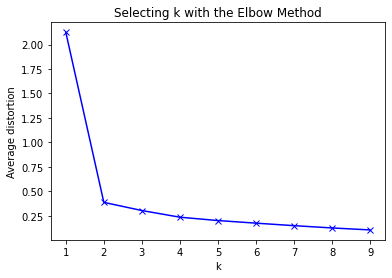

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))
X = np.hstack((cluster1, cluster2)).T
#X = np.vstack((cluster1, cluster2)).T
K = range(1, 10)
meandistortions = []
for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X) 
  meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

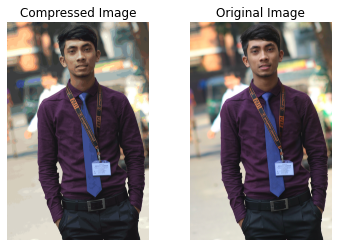

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

from skimage import io
#import mahotas as mh
import cv2
original_img = np.array(io.imread('IMG_0559-01.jpeg'), dtype=np.
float64) / 255
# img = cv2.imread('IMG_0559-01.jpeg')
# print(original_img)


original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)
image_flattened = np.reshape(original_img, (width * height, depth))

image_array_sample = shuffle(image_flattened, random_state=0)[:1000]
estimator = KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)
cluster_assignments = estimator.predict(image_flattened)

compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.
shape[1]))
label_idx = 0
for i in range(width):
  for j in range(height):
    compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
    label_idx += 1


plt.subplot(122)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')
plt.subplot(121)
plt.title('Compressed Image')
plt.imshow(compressed_img)
plt.axis('off')
plt.show()
